<a href="https://colab.research.google.com/github/Angana007/machine_learning_classwork/blob/main/classwork_classification_models_breast_cancer_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.pipeline import Pipeline


In [3]:
!wget https://raw.githubusercontent.com/SimplyLearner/Dataset/master/Breast_cancer_dataset.csv

--2024-09-03 17:01:30--  https://raw.githubusercontent.com/SimplyLearner/Dataset/master/Breast_cancer_dataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 125204 (122K) [text/plain]
Saving to: ‘Breast_cancer_dataset.csv’

Breast_cancer_datas 100%[===================>] 122.27K  --.-KB/s    in 0.03s   

2024-09-03 17:01:31 (3.56 MB/s) - ‘Breast_cancer_dataset.csv’ saved [125204/125204]



In [4]:
df = pd.read_csv("Breast_cancer_dataset.csv")
df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
df.drop(columns=["id","Unnamed: 32"],inplace=True) #these 2 columns don't see necessary

In [7]:
df.nunique()

diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
dtype: int64

In [8]:
df['diagnosis'].value_counts(normalize=True)

diagnosis
B    0.627417
M    0.372583
Name: proportion, dtype: float64

In [9]:
df.describe()

radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  fractal_dimension_mean  ...  radius_worst  \
count     569.000000              569.000000  ...    569.000000   
mean        0.181162                0.062798  ...     16.269190   
std         0.027414                0.007060  ...      4.833242   
min         0.106000                0.049960  ...      7.930000   
25%         0.161900                0.057700  ...     13.010000   
50%         0.179200                0.061540  ...     14.970000   
75%         0.195700                0.066120  ...     18.790000   
max         0.304000                0.097440  ...     36.040000   

       texture_worst  perimeter_worst   area_worst  smoothness_worst  \
count     569.000000       569.000000   569.000000        569.000000   
mean       25.677223       107.261213   880.583128          0.132369   
std         6.146258        33.602542   569.356993          0.022832   
min        12.020000        50.410000   185.200000          0.071170   
25%        21.080000        84.110000   515.300000          0.116600   
50%        25.410000        97.660000   686.500000          0.131300   
75%        29.720000       125.400000  1084.000000          0.146000   
max        49.540000       251.200000  4254.000000          0.222600   

       compactness_worst  concavity_worst  concave points_worst  \
count         569.000000       569.000000            569.000000   
mean            0.254265         0.272188              0.114606   
std             0.157336         0.208624              0.065732   
min             0.027290         0.000000              0.000000   
25%             0.147200         0.114500              0.064930   
50%             0.211900         0.226700              0.099930   
75%             0.339100         0.382900              0.161400   
max             1.058000         1.252000              0.291000   

       symmetry_worst  fractal_dimension_worst  
count      569.000000               569.000000  
mean         0.290076                 0.083946  
std          0.061867                 0.018061  
min          0.156500                 0.055040  
25%          0.250400                 0.071460  
50%          0.282200                 0.080040  
75%          0.317900                 0.092080  
max          0.663800                 0.207500  

[8 rows x 30 columns]

In [10]:
# Check for missing values
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

No missing values in the dataset

In [11]:
df["diagnosis"].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

Plotting a heatmap to find out correlation between different parameters so that we have a better idea on which pairs show high correlation

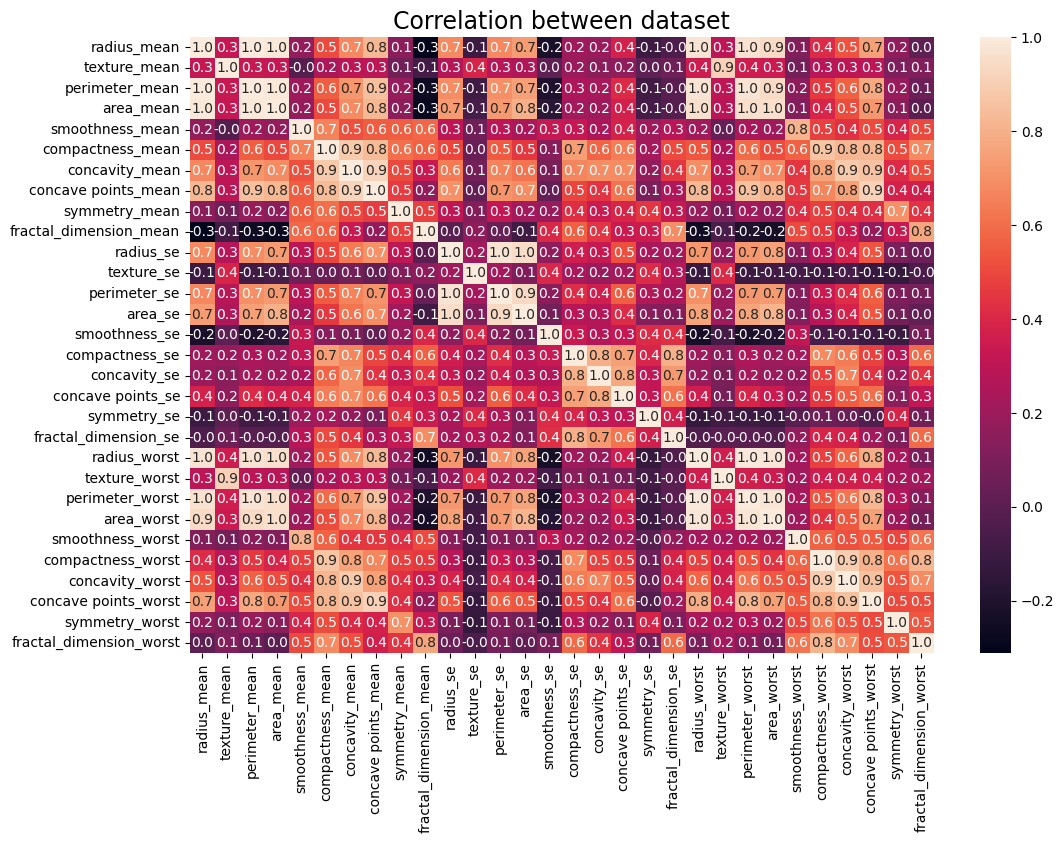

In [12]:
# Correlation heatmap
plt.figure(figsize=(12,8))
c=df.corr(numeric_only=True)
sns.heatmap(c,annot=True,fmt=".1f")
plt.title("Correlation between dataset",fontsize=17,c="k")
plt.show()

Converting Categorical variable **diagnosis** into one-hot encoded numerical variable with ***benign*** instances assigned 0 and ***malignant*** 1

In [13]:
from sklearn.preprocessing import LabelEncoder
Encoder=LabelEncoder()
df["diagnosis"]=Encoder.fit_transform(df["diagnosis"])
df["diagnosis"]

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [14]:
df.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

# Logistic Regression

We will split the data into training and test data in the ratio 80-20.

In [15]:
#Splitting data into feature (x) and target (y)
x = df.drop('diagnosis',axis=1)
y = df['diagnosis']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

We will now define a pipeline. In order to standardize the features, we will use Standard Scalar so that the feature values have a mean of 0 and std of 1. Consequently, we will use logistic regression model.

In [16]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('log_reg', LogisticRegression(max_iter=10000, random_state=42))
])

pipeline.fit(x_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('log_reg',
                 LogisticRegression(max_iter=10000, random_state=42))])

In [17]:
#Predict on the training and testing set
y_pred_train_log_reg = pipeline.predict(x_train)
y_pred_test_log_reg = pipeline.predict(x_test)

# Predict probabilities on the testing set
y_pred_test_prob_log_reg = pipeline.predict_proba(x_test)[:, 1]

In [18]:
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test_log_reg, 'Probability': y_pred_test_prob_log_reg})

In [19]:
results_df.head()

Actual  Predicted  Probability
204       0          0     0.114327
70        1          1     0.999991
131       1          1     0.996902
431       0          0     0.000511
540       0          0     0.000061

In [20]:
# Calculate the training and testing accuracy
training_accuracy = accuracy_score(y_train, y_pred_train_log_reg)
testing_accuracy = accuracy_score(y_test, y_pred_test_log_reg)

print("Logistic Regression")
print(f"Training Accuracy: {training_accuracy}")
print(f"Testing Accuracy: {testing_accuracy}")

Logistic Regression
Training Accuracy: 0.9868131868131869
Testing Accuracy: 0.9736842105263158


Both training and testing accuracies are high, indicating good overall performance of the logistic regression model. The slight drop from training to testing accuracy (from 98.68% to 97.37%) is expected and acceptable, showing that the model generalizes well without overfitting. If the training accuracy were significantly higher than the testing accuracy, it would suggest overfitting. However, in this case, the difference is small, indicating that the model is not overfitting. Now proceeding to finding out confusion matrix.

Confusion Matrix:
[[70  1]
 [ 2 41]]


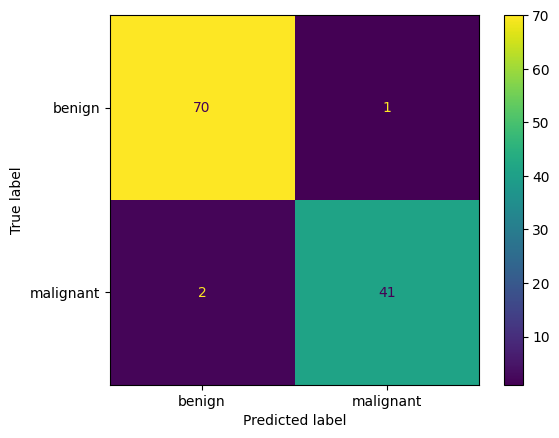

In [21]:
# Print confusion matrix
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.metrics import ConfusionMatrixDisplay

conf_matrix = confusion_matrix(y_test, y_pred_test_log_reg)
print("Confusion Matrix:")
print(conf_matrix)

# Heatmap visualization for confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = ["benign", "malignant"])

# display matrix
cm_display.plot()
plt.show()


So 41 cases are truly positive malignant cases and 70 cases are benign. There's 2 case of false negative and 1 case of false positive which means that the model incorrectly predicted 1 instance as "malignant" when it was actually benign and the model incorrectly predicted 2 instances as "benign" when they were actually malignant.

In [22]:
# Print classification report
print("\t\tLogistic Regression Classification Report:")
print("\t\t-----------------------------------------")
print(classification_report(y_test, y_pred_test_log_reg))

		Logistic Regression Classification Report:
		-----------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



Optimal Threshold: 0.4867


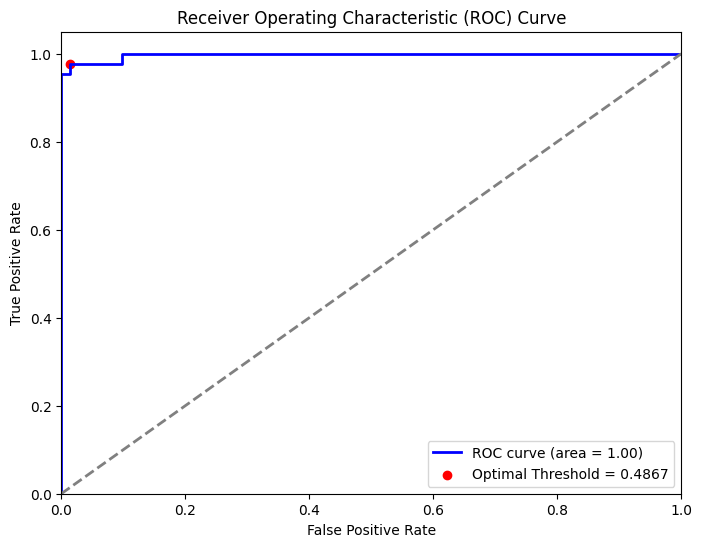

In [23]:
# Compute the false positive rate (fpr), true positive rate (tpr), and thresholds for different thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_prob_log_reg)

# Compute the Area Under the Curve (AUC) for the ROC curve
roc_auc = auc(fpr, tpr)

# Compute Youden's J statistic for each threshold
youden_j = tpr - fpr
optimal_threshold_index = np.argmax(youden_j)
optimal_threshold = thresholds[optimal_threshold_index]

print(f"Optimal Threshold: {optimal_threshold:.4f}")

# Plot the ROC curve with the optimal threshold marked
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.scatter(fpr[optimal_threshold_index], tpr[optimal_threshold_index], color='red', marker='o', label=f'Optimal Threshold = {optimal_threshold:.4f}')
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

The ROC curve shows the trade-off between true positive rate and false positive rate at various threshold settings. The AUC value indicates the model's ability to discriminate between positive and negative classes.

The Optimal threshold of 0.4867 defines the decision boundary for the classifier. Probabilities above this value indicate a stronger belief that an instance belongs to the positive class, whereas probabilities below this value indicate a stronger belief that an instance belongs to the negative class. The ROC curve for the logistic regression model has AUC of 1.00. So that's great.

# Naive Bayes Classifier

In [24]:
# Import Required Libraries and apply Naive Bayes algorithm
from sklearn.naive_bayes import GaussianNB
# Define the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('nb', GaussianNB())
])

# Fit the pipeline on the training data
pipeline.fit(x_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('nb', GaussianNB())])

In [25]:
#Predict on the training and testing set
y_pred_train_nb = pipeline.predict(x_train)
y_pred_test_nb = pipeline.predict(x_test)

# Calculate the training and testing accuracy
training_accuracy = accuracy_score(y_train, y_pred_train_nb)
testing_accuracy = accuracy_score(y_test, y_pred_test_nb)
print("\nNaïve Bayes:")
print(f"Training Accuracy: {training_accuracy}")
print(f"Testing Accuracy: {testing_accuracy}")

y_pred_prob_nb = pipeline.predict_proba(x_test)[:, 1]


Naïve Bayes:
Training Accuracy: 0.9362637362637363
Testing Accuracy: 0.9649122807017544


In [26]:
results_df = pd.DataFrame({
    'Actual Label': y_test,
    'Predicted Label': y_pred_test_nb,
    'Predicted Probability': y_pred_prob_nb
})

results_df.head()

Actual Label  Predicted Label  Predicted Probability
204             0                0           1.349483e-09
70              1                1           1.000000e+00
131             1                1           1.000000e+00
431             0                0           9.801091e-12
540             0                0           8.102568e-15

Confusion Matrix:
[[70  1]
 [ 3 40]]


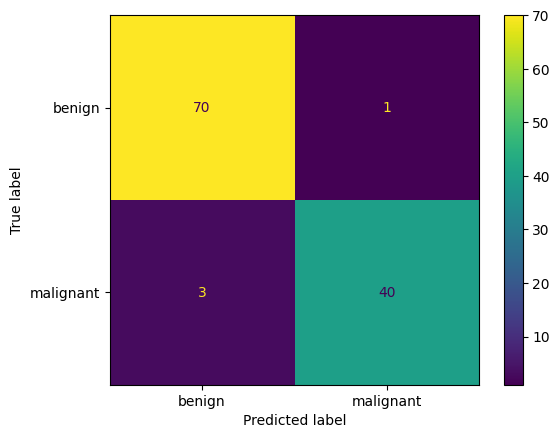

In [27]:
# Print confusion matrix
conf_matrix_nb = confusion_matrix(y_test, y_pred_test_nb)
print("Confusion Matrix:")
print(conf_matrix_nb)

# Heatmap visualization for confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix_nb, display_labels = ["benign", "malignant"])
# display matrix
cm_display.plot()
plt.show()

In [28]:
# Print classification report
print("\t\tNaïve Bayes Classification Report:")
print("\t\t-----------------------------------")
print(classification_report(y_test, y_pred_test_nb))

		Naïve Bayes Classification Report:
		-----------------------------------
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



Optimal Threshold: 0.0126


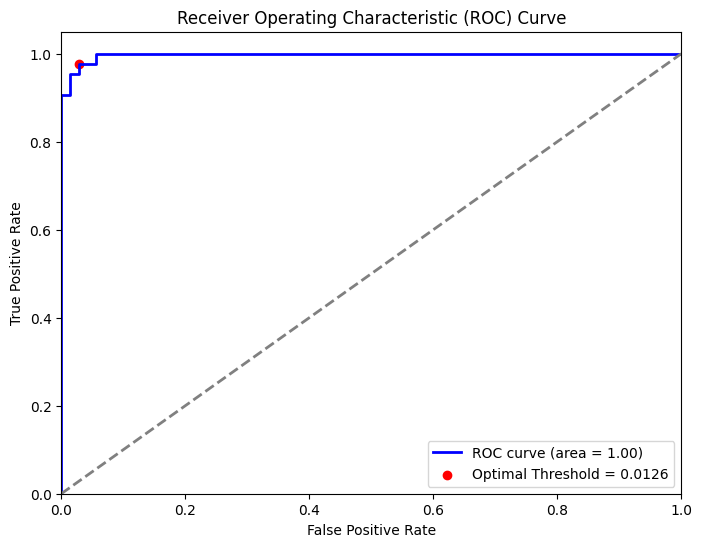

In [29]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_nb)

# Compute the Area Under the Curve (AUC) for the ROC curve
roc_auc = auc(fpr, tpr)

# Compute Youden's J statistic for each threshold
youden_j = tpr - fpr
optimal_threshold_index = np.argmax(youden_j)
optimal_threshold = thresholds[optimal_threshold_index]

print(f"Optimal Threshold: {optimal_threshold:.4f}")

# Plot the ROC curve with the optimal threshold marked
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.scatter(fpr[optimal_threshold_index], tpr[optimal_threshold_index], color='red', marker='o', label=f'Optimal Threshold = {optimal_threshold:.4f}')
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Area under curve is 1.00 which indicates that the model is highly efficient in distinguising benign and malignant cases of breast cancer.

The optimal threshold is 0.0126 which indicates that the model is set to be quite conservative in its predictions. It means that the model will only classify an instance as positive if it's extremely confident in its prediction, requiring a very high probability of being positive. This threshold will likely result in a high precision, meaning that when the model predicts a positive, it's highly likely to be correct. However, it may also lead to a lower recall, as it might miss some true positive cases.

# K-Nearest Neighbors (KNN)